# Face Detection System for Digital Cameras

This notebook implements a face recognition system based on machine learning techniques.
The system uses the WIDER FACE dataset accessible through Deeplake and builds a face detector from scratch.

## 1. Module Imports

Let's import all necessary modules for the project.

In [ ]:
#%pip install --upgrade pip
#%pip install numpy==1.26.0  # Latest version compatible with Python 3.12
#%pip install scipy==1.13.0  # Version compatible with numpy 1.26.0
#%pip install opencv-python-headless==4.8.1.78  # Working version for Python 3.12
#%pip install scikit-learn==1.4.0  # Version compatible with numpy 1.26.0 and scipy 1.13.0
#%pip install scikit-image==0.22.0  # Version compatible with numpy 1.26.0

# After kernel restart, import libraries
import numpy as np
import cv2
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import skimage  # Add this line to import the full skimage module
from skimage.feature import hog, local_binary_pattern
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

# Print versions to verify
print(f"NumPy version: {np.__version__}")
print(f"OpenCV version: {cv2.__version__}")
print(f"scikit-learn version: {sklearn_version}")
print(f"scikit-image version: {skimage.__version__}")
print("All modules imported successfully")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
NumPy version: 1.26.0
OpenCV version: 4.8.1
scikit-learn version: 1.4.0
scikit-image version: 0.22.0
All modules imported successfully


# 2. Dataset Loading and Exploration

Accessing and exploring WIDER FACE dataset...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.9/642.9 kB 28.0 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 30.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 70.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.3 MB/s  0:00:00
  Created wheel for deeplake: filename=deeplake-3.9.49-py3-none-any.whl size=772422 sha256=a34e4693250ef62159bd27fe31cac6a69f1e7f4f44b0faa2edddc78082105259
  Stored in directory: /home/codespace/.cache/pip/wheels/af/3d/41/21c5b9dbc719d9c9812b5c1c2330e3afb218a3f7bdb43d9735
Successfully built deeplake
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.

/usr/local/python/3.12.1/lib/python3.12/site-packages/humbug/report.py:47: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # type: ignore
/usr/local/python/3.12.1/lib/python3.12/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.2.14) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


Installed Deeplake version: 3.9.49


-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/wider-face-train



\

hub://activeloop/wider-face-train loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/wider-face-val



-

hub://activeloop/wider-face-val loaded successfully.



Train dataset: 12880 images
Validation dataset: 3226 images

Available tensors in the dataset:
['images', 'boxes', 'poses', 'expressions', 'illuminations', 'occlusions', 'validities', 'blurs']


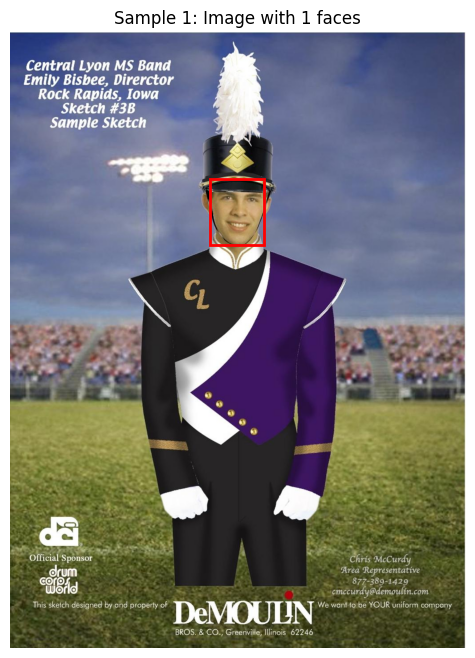

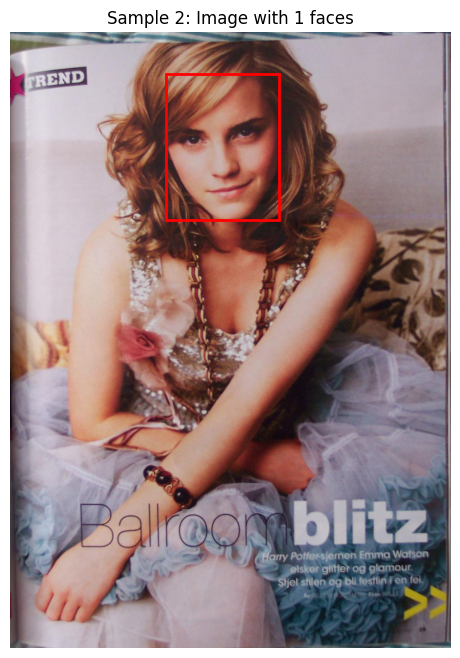

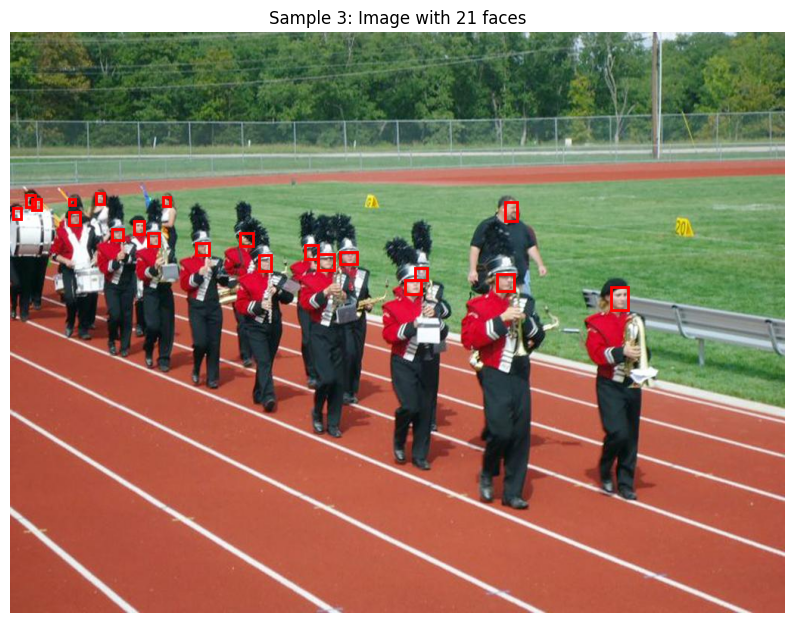


# Detailed Sample Exploration
Sample 10 information:
Image shape: (755, 1024, 3)
Number of faces: 6


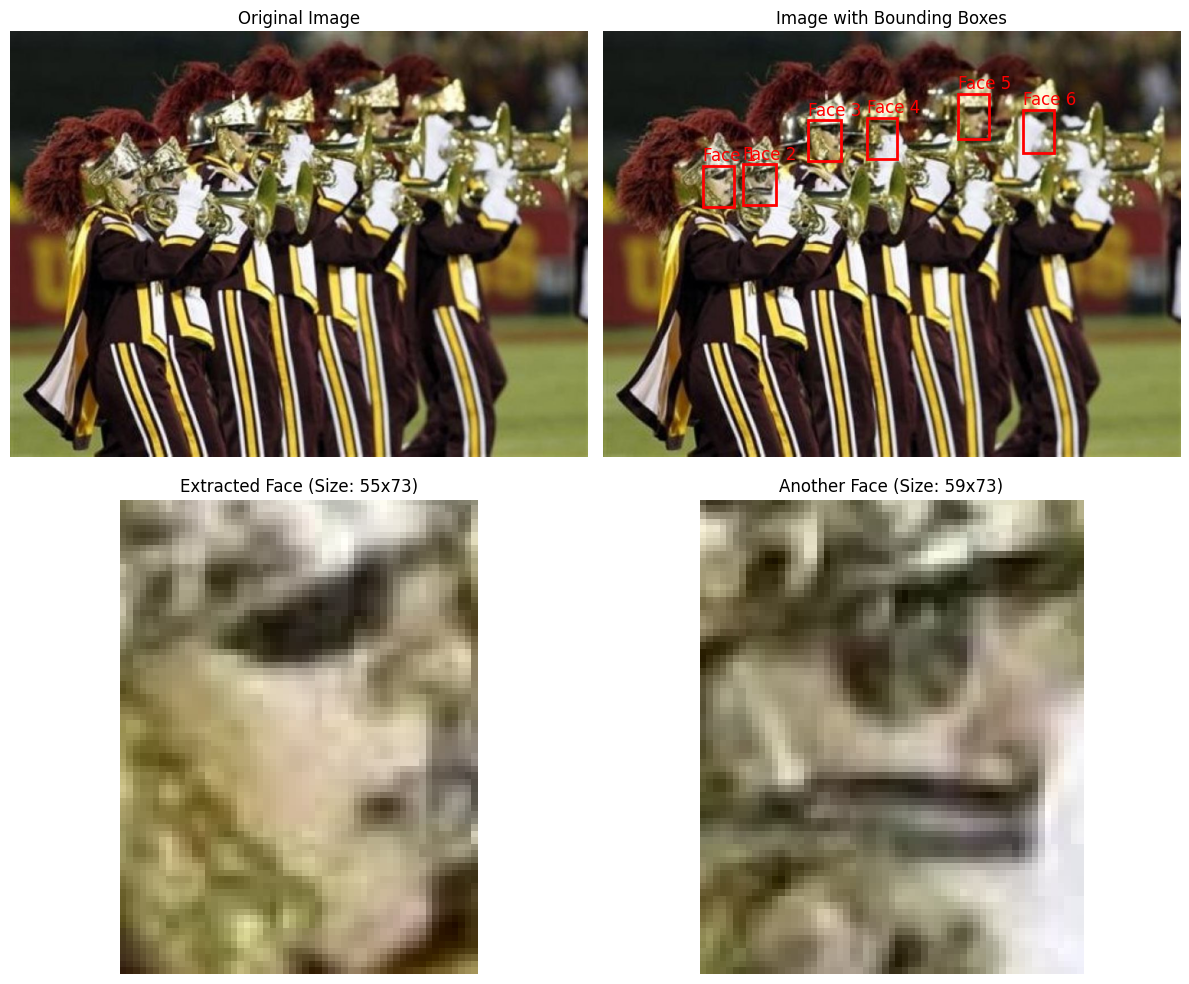


Dataset Statistics:


/usr/local/python/3.12.1/lib/python3.12/site-packages/deeplake/core/tensor.py:719: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


Average faces per image (first 100 images): 37.77

Image dimension statistics:
Average height: 851.22 pixels
Average width: 1024.00 pixels
Height range: 511 to 1583 pixels
Width range: 1024 to 1024 pixels

Face size statistics:
Average face width: 15.60 pixels
Average face height: 19.72 pixels
Face width range: 2.00 to 455.00 pixels
Face height range: 1.00 to 582.00 pixels


In [ ]:
# 2. Dataset Access and Exploration - Using Activeloop public dataset

print("Accessing and exploring WIDER FACE dataset...")

# First completely uninstall deeplake to avoid version conflicts
#!pip uninstall -y deeplake hub

# Install the latest version of deeplake that should work with public datasets
#!pip install "deeplake<4"

# Import the freshly installed version
import importlib
import deeplake
importlib.reload(deeplake)
print(f"Installed Deeplake version: {deeplake.__version__}")

ds_train = deeplake.load('hub://activeloop/wider-face-train')
ds_val = deeplake.load('hub://activeloop/wider-face-val')

# Dataset Exploration and Visualization using Deeplake's API compatible with version 3.x
try:
    # Print dataset information
    print(f"Train dataset: {len(ds_train)} images")
    print(f"Validation dataset: {len(ds_val)} images")
    
    # Print available tensors
    print("\nAvailable tensors in the dataset:")
    tensor_keys = list(ds_train.tensors.keys())
    print(tensor_keys)
    
    # Display a few sample images with face bounding boxes
    # Using compatible API for Deeplake 3.x
    for idx in range(3):  # Show first 3 samples
        plt.figure(figsize=(10, 8))
        
        # Get and display image using direct indexing
        image = ds_train.images[idx].numpy()
        plt.imshow(image)
        
        # Get and display bounding boxes
        boxes = ds_train.boxes[idx].numpy()
        for box in boxes:
            x, y, width, height = box
            rect = plt.Rectangle((x, y), width, height, 
                               fill=False, edgecolor='red', linewidth=2)
            plt.gca().add_patch(rect)
        
        plt.title(f"Sample {idx+1}: Image with {len(boxes)} faces")
        plt.axis('off')
        plt.show()
    
    # Detailed example of a specific sample with its bounding box
    print("\n# Detailed Sample Exploration")
    
    # Get a sample with a clear face
    sample_idx = 10  # You can change this to explore different samples
    
    # Get image and boxes directly
    image = ds_train.images[sample_idx].numpy()
    boxes = ds_train.boxes[sample_idx].numpy()
    
    # Print detailed information
    print(f"Sample {sample_idx} information:")
    print(f"Image shape: {image.shape}")
    print(f"Number of faces: {len(boxes)}")
    
    # Plot original image
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Plot image with bounding boxes
    plt.subplot(2, 2, 2)
    plt.imshow(image)
    for i, box in enumerate(boxes):
        x, y, width, height = box
        rect = plt.Rectangle((x, y), width, height, 
                          fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        plt.text(x, y-10, f"Face {i+1}", color='red', fontsize=12)
    plt.title("Image with Bounding Boxes")
    plt.axis('off')
    
    # Extract and display face crops
    if len(boxes) > 0:
        plt.subplot(2, 2, 3)
        # Get the first face
        box = boxes[0]
        x, y, width, height = box
        # Convert to integers for slicing
        x, y, width, height = int(x), int(y), int(width), int(height)
        # Extract face region
        face = image[y:y+height, x:x+width]
        plt.imshow(face)
        plt.title(f"Extracted Face (Size: {width}x{height})")
        plt.axis('off')
        
        # If there are multiple faces, show another one
        if len(boxes) > 1:
            plt.subplot(2, 2, 4)
            box = boxes[1]
            x, y, width, height = box
            # Convert to integers for slicing
            x, y, width, height = int(x), int(y), int(width), int(height)
            # Extract face region
            face = image[y:y+height, x:x+width]
            plt.imshow(face)
            plt.title(f"Another Face (Size: {width}x{height})")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate dataset statistics efficiently
    print("\nDataset Statistics:")
    
    # Calculate statistics using direct access API
    total_faces = 0
    sample_count = 0
    heights = []
    widths = []
    face_widths = []
    face_heights = []
    
    # Using direct indexing for Deeplake 3.x
    # Process in batches to be more efficient
    batch_size = 10
    num_samples = min(100, len(ds_train))
    
    for batch_start in range(0, num_samples, batch_size):
        batch_end = min(batch_start + batch_size, num_samples)
        
        for idx in range(batch_start, batch_end):
            # Count faces
            boxes = ds_train.boxes[idx].numpy()
            total_faces += len(boxes)
            sample_count += 1
            
            # Track image dimensions
            if idx < 50:  # Get dimensions for first 50 images
                img = ds_train.images[idx].numpy()
                heights.append(img.shape[0])
                widths.append(img.shape[1])
            
            # Collect face dimensions
            for box in boxes:
                _, _, width, height = box
                face_widths.append(width)
                face_heights.append(height)
    
    # Calculate statistics
    avg_faces = total_faces / sample_count
    print(f"Average faces per image (first {sample_count} images): {avg_faces:.2f}")
    
    # Print image dimension statistics
    print("\nImage dimension statistics:")
    print(f"Average height: {sum(heights)/len(heights):.2f} pixels")
    print(f"Average width: {sum(widths)/len(widths):.2f} pixels")
    print(f"Height range: {min(heights)} to {max(heights)} pixels")
    print(f"Width range: {min(widths)} to {max(widths)} pixels")
    
    # Print face size statistics
    if face_widths:
        print("\nFace size statistics:")
        print(f"Average face width: {sum(face_widths)/len(face_widths):.2f} pixels")
        print(f"Average face height: {sum(face_heights)/len(face_heights):.2f} pixels")
        print(f"Face width range: {min(face_widths):.2f} to {max(face_widths):.2f} pixels")
        print(f"Face height range: {min(face_heights):.2f} to {max(face_heights):.2f} pixels")
    else:
        print("\nNo face data available in the analyzed samples")

except Exception as e:
    print(f"Error exploring dataset: {e}")
    print("\nMake sure 'ds_train' and 'ds_val' are defined. If they aren't, add this code before the try block:")
    print("ds_train = deeplake.load('hub://activeloop/wider-face-train')")
    print("ds_val = deeplake.load('hub://activeloop/wider-face-val')")

# 3. Data preparation for Model Training

Preparing dataset for face detection model...
Extracting samples from 5000 images...
Processing image 0/5000...
Processing image 100/5000...
Processing image 200/5000...
Processing image 300/5000...
Processing image 400/5000...
Processing image 500/5000...
Processing image 600/5000...
Processing image 700/5000...
Processing image 800/5000...
Processing image 900/5000...
Processing image 1000/5000...
Processing image 1100/5000...
Processing image 1200/5000...
Processing image 1300/5000...
Processing image 1400/5000...
Processing image 1500/5000...
Processing image 1600/5000...
Processing image 1700/5000...
Processing image 1800/5000...
Processing image 1900/5000...
Processing image 2000/5000...
Processing image 2100/5000...
Processing image 2200/5000...


Processing image 2300/5000...
Processing image 2400/5000...
Processing image 2500/5000...
Processing image 2600/5000...
Processing image 2700/5000...
Processing image 2800/5000...
Processing image 2900/5000...
Processing image 3000/5000...
Processing image 3100/5000...
Processing image 3200/5000...
Processing image 3300/5000...
Processing image 3400/5000...
Processing image 3500/5000...
Processing image 3600/5000...
Processing image 3700/5000...
Processing image 3800/5000...
Processing image 3900/5000...
Processing image 4000/5000...
Processing image 4100/5000...
Processing image 4200/5000...
Processing image 4300/5000...
Processing image 4400/5000...
Processing image 4500/5000...
Processing image 4600/5000...
Processing image 4700/5000...
Processing image 4800/5000...
Processing image 4900/5000...
Dataset created with 32290 face samples and 8772 non-face samples


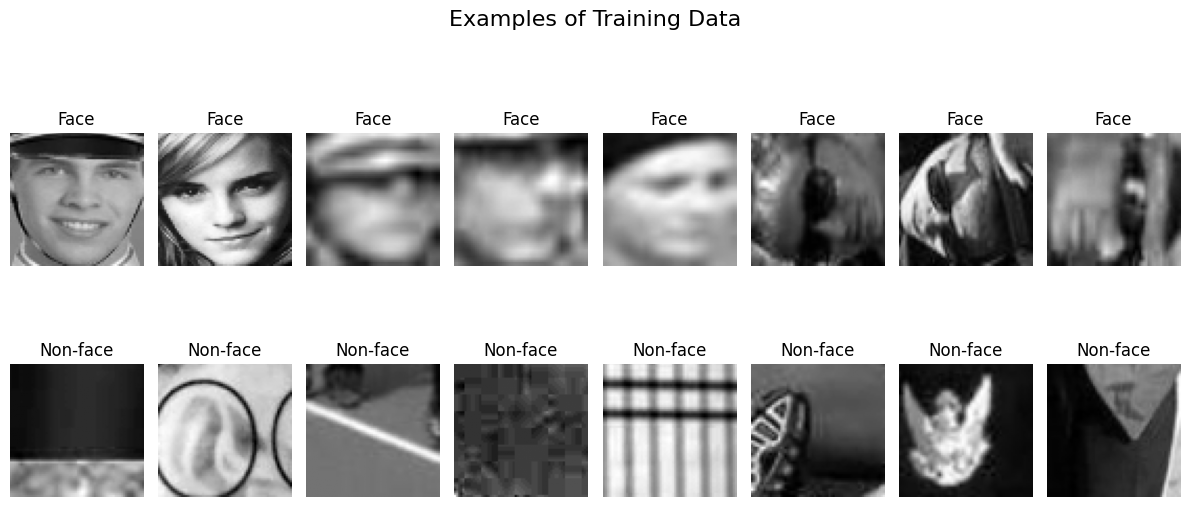

In [ ]:
# 3. Data Preparation for Model Training

print("Preparing dataset for face detection model...")

# Define constants and parameters
FACE_SIZE = (64, 64)  # Standard size for all face/non-face samples
MAX_SAMPLES = 1000    # Ridotto da 5000 a 1000 per accelerare il training
NEGATIVE_PER_IMAGE = 2  # Number of negative samples per image

try:
    # Make sure dataset is loaded
    if 'ds_train' not in globals():
        print("Loading WIDER FACE dataset...")
        ds_train = deeplake.load('hub://activeloop/wider-face-train')
        ds_val = deeplake.load('hub://activeloop/wider-face-val')
    
    # Create lists to store face and non-face samples
    faces = []          # Will store face images
    non_faces = []      # Will store non-face images
    labels = []         # Will store labels (1 for face, 0 for non-face)
    
    # Process images to extract face and non-face regions
    num_samples = min(MAX_SAMPLES, len(ds_train))
    print(f"Extracting samples from {num_samples} images...")
    
    for idx in range(num_samples):
        if idx % 100 == 0:
            print(f"Processing image {idx}/{num_samples}...")
        
        # Get image and boxes
        image = ds_train.images[idx].numpy()
        boxes = ds_train.boxes[idx].numpy()
        
        # Skip images without faces
        if len(boxes) == 0:
            continue
        
        # Process each face in the image (positive samples)
        for box in boxes:
            x, y, width, height = box
            # Convert to integers for slicing
            x, y, width, height = int(x), int(y), int(width), int(height)
            
            # Skip very small faces
            if width < 20 or height < 20:
                continue
                
            # Extract face region
            face = image[y:y+height, x:x+width]
            
            # Resize to standard size
            try:
                face_resized = cv2.resize(face, FACE_SIZE)
                
                # Convert to grayscale if color
                if len(face_resized.shape) == 3:
                    face_gray = cv2.cvtColor(face_resized, cv2.COLOR_RGB2GRAY)
                else:
                    face_gray = face_resized
                
                faces.append(face_gray)
                labels.append(1)  # 1 for face
            except:
                # Skip faces that cause errors during resizing
                continue
        
        # Extract random non-face regions (negative samples)
        h, w = image.shape[0], image.shape[1]
        for _ in range(min(NEGATIVE_PER_IMAGE, len(boxes))):
            # Try to find non-overlapping regions
            max_attempts = 10
            found_valid = False
            
            for _ in range(max_attempts):
                # Generate random size (similar to face sizes)
                non_face_size = np.random.randint(40, 120)
                
                # Generate random position
                if w > non_face_size and h > non_face_size:
                    nx = np.random.randint(0, w - non_face_size)
                    ny = np.random.randint(0, h - non_face_size)
                    
                    # Check if this region overlaps with any face
                    overlaps = False
                    for box in boxes:
                        fx, fy, fw, fh = box
                        fx, fy = int(fx), int(fy)
                        
                        # Check for overlap
                        if not (nx > fx + fw or nx + non_face_size < fx or 
                                ny > fy + fh or ny + non_face_size < fy):
                            overlaps = True
                            break
                    
                    if not overlaps:
                        # Extract non-face region
                        non_face = image[ny:ny+non_face_size, nx:nx+non_face_size]
                        
                        # Resize to standard size
                        try:
                            non_face_resized = cv2.resize(non_face, FACE_SIZE)
                            
                            # Convert to grayscale if color
                            if len(non_face_resized.shape) == 3:
                                non_face_gray = cv2.cvtColor(non_face_resized, cv2.COLOR_RGB2GRAY)
                            else:
                                non_face_gray = non_face_resized
                            
                            non_faces.append(non_face_gray)
                            labels.append(0)  # 0 for non-face
                            found_valid = True
                            break
                        except:
                            continue
            
            if not found_valid:
                # If couldn't find non-overlapping region, just pick random
                if w > 64 and h > 64:
                    nx = np.random.randint(0, w - 64)
                    ny = np.random.randint(0, h - 64)
                    non_face = image[ny:ny+64, nx:nx+64]
                    
                    try:
                        non_face_resized = cv2.resize(non_face, FACE_SIZE)
                        if len(non_face_resized.shape) == 3:
                            non_face_gray = cv2.cvtColor(non_face_resized, cv2.COLOR_RGB2GRAY)
                        else:
                            non_face_gray = non_face_resized
                        
                        non_faces.append(non_face_gray)
                        labels.append(0)
                    except:
                        continue
    
    # Convert lists to numpy arrays
    X_faces = np.array(faces)
    X_non_faces = np.array(non_faces)
    y = np.array(labels)
    
    # Combine faces and non-faces into a single dataset
    X = np.vstack([X_faces, X_non_faces])
    
    print(f"Dataset created with {len(X_faces)} face samples and {len(X_non_faces)} non-face samples")
    
    # Display examples of face and non-face samples
    plt.figure(figsize=(12, 6))
    plt.suptitle("Examples of Training Data", fontsize=16)
    
    # Show face examples
    for i in range(min(8, len(X_faces))):
        plt.subplot(2, 8, i+1)
        plt.imshow(X_faces[i], cmap='gray')
        plt.title("Face")
        plt.axis('off')
    
    # Show non-face examples
    for i in range(min(8, len(X_non_faces))):
        plt.subplot(2, 8, 8+i+1)
        plt.imshow(X_non_faces[i], cmap='gray')
        plt.title("Non-face")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error during data preparation: {e}")
    import traceback
    traceback.print_exc()

# 4. Feature Extraction with HOG + LBP

In this section, we implement a combined feature extraction approach that uses both HOG (Histogram of Oriented Gradients) and LBP (Local Binary Patterns) features:

- HOG captures gradient orientation information, good for detecting shapes and edges
- LBP captures texture information and is highly resistant to illumination changes

By combining these complementary feature types, we should achieve better face detection performance.

Extracting HOG + LBP features from face and non-face samples...
Extracting combined HOG+LBP features...
Processing images 0 to 499 of 41062...


/usr/local/python/3.12.1/lib/python3.12/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Current memory usage: 1606.70 MB
Processing images 500 to 999 of 41062...
Current memory usage: 1606.70 MB
Processing images 1000 to 1499 of 41062...
Current memory usage: 1606.70 MB
Processing images 1500 to 1999 of 41062...
Current memory usage: 1606.70 MB
Processing images 2000 to 2499 of 41062...
Current memory usage: 1606.70 MB
Processing images 2500 to 2999 of 41062...
Current memory usage: 1606.70 MB
Processing images 3000 to 3499 of 41062...
Current memory usage: 1607.82 MB
Processing images 3500 to 3999 of 41062...
Current memory usage: 1615.20 MB
Processing images 4000 to 4499 of 41062...
Current memory usage: 1622.95 MB
Processing images 4500 to 4999 of 41062...
Current memory usage: 1630.45 MB
Processing images 5000 to 5499 of 41062...
Current memory usage: 1637.95 MB
Processing images 5500 to 5999 of 41062...
Current memory usage: 1645.45 MB
Processing images 6000 to 6499 of 41062...
Current memory usage: 1653.07 MB
Processing images 6500 to 6999 of 41062...
Current memory

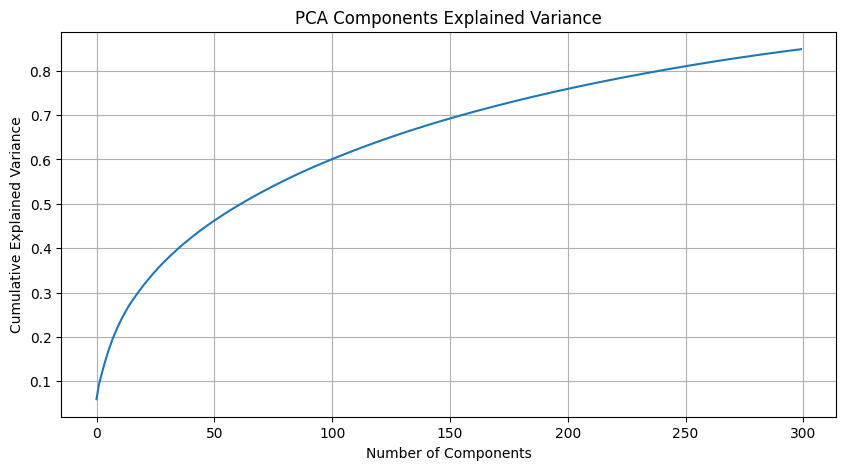

Saving processed HOG+LBP data...
Feature extraction with HOG+LBP complete!


/usr/local/python/3.12.1/lib/python3.12/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


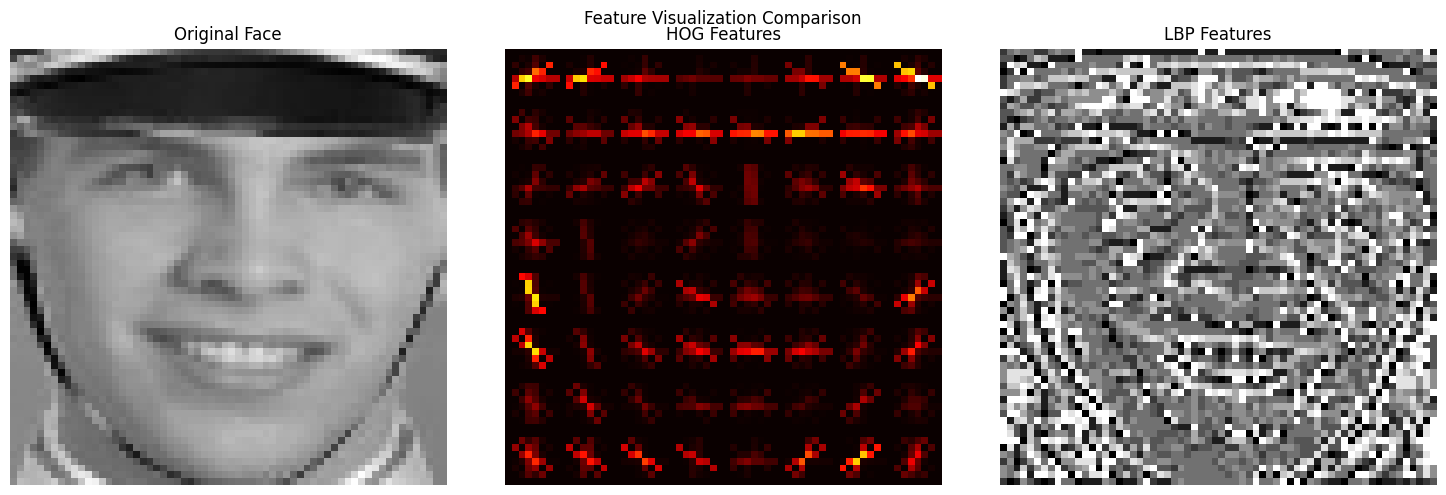

In [ ]:
# 4 Feature Extraction with HOG + LBP

print("Extracting HOG + LBP features from face and non-face samples...")

try:
    # Funzione per ottimizzare la memoria
    def optimize_memory():
        """Force garbage collection and clear matplotlib cache to optimize memory usage."""
        import gc
        import matplotlib.pyplot as plt
        
        # Close all matplotlib figures
        plt.close('all')
        
        # Run garbage collection multiple times to ensure cleanup
        for _ in range(3):
            gc.collect()
        
        # Print memory usage if psutil is available
        try:
            import psutil
            process = psutil.Process()
            memory_info = process.memory_info()
            print(f"Current memory usage: {memory_info.rss / (1024 * 1024):.2f} MB")
        except ImportError:
            pass

    # Function to extract both HOG and LBP features in batches to optimize memory usage
    def extract_hog_lbp_features_in_batches(images, batch_size=1000):  # Aumentato il batch_size da 500 a 1000
        total_images = len(images)
        features = []
        
        # Process images in batches
        for batch_start in range(0, total_images, batch_size):
            batch_end = min(batch_start + batch_size, total_images)
            print(f"Processing images {batch_start} to {batch_end-1} of {total_images}...")
            
            batch_features = []
            for img in images[batch_start:batch_end]:
                # Normalize image if needed
                if img.max() > 1.0:
                    img = img / 255.0
                
                # 1. Extract HOG features
                hog_feat = hog(img, orientations=9, 
                               pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), 
                               visualize=False,
                               feature_vector=True)
                
                # 2. Extract LBP features
                # Use uniform LBP with radius=1 and 8 points
                lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
                
                # Compute histogram of LBP values (uniform method has 59 output values)
                n_bins = 59  # for uniform LBP with P=8
                hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)
                
                # 3. Combine HOG and LBP features
                combined_feat = np.concatenate([hog_feat, hist])
                batch_features.append(combined_feat)
            
            # Add batch features to main list
            features.extend(batch_features)
            
            # Force memory cleanup
            optimize_memory()
            
        return np.array(features)
    
    # Extract HOG+LBP features in batches
    print("Extracting combined HOG+LBP features...")
    X_features = extract_hog_lbp_features_in_batches(X, batch_size=1000)  # Aumentato il batch_size da 500 a 1000
    
    print(f"Combined feature vector shape: {X_features.shape}")
    
    # Split data - handle memory carefully
    print("Splitting data into train/validation/test sets (60/20/20)...")
    
    # First split: 60% train, 40% temp
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_features, y, test_size=0.4, random_state=42, stratify=y
    )
    
    # Release X_features from memory
    del X_features
    optimize_memory()
    
    # Second split: split temp into validation and test (50/50)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Release X_temp from memory
    del X_temp, y_temp
    optimize_memory()
    
    print(f"Training set: {X_train.shape} ({len(X_train)} samples)")
    print(f"Validation set: {X_val.shape} ({len(X_val)} samples)")
    print(f"Test set: {X_test.shape} ({len(X_test)} samples)")
    
    # Apply PCA for dimensionality reduction with memory optimization
    apply_pca = True
    if apply_pca:
        n_components = min(300, X_train.shape[1])
        print(f"Applying PCA to reduce dimensions to {n_components}...")
        
        # Apply PCA with randomized solver for efficiency
        pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
        
        # Transform data
        X_train_pca = pca.fit_transform(X_train)
        X_val_pca = pca.transform(X_val)
        X_test_pca = pca.transform(X_test)
        
        print(f"Explained variance: {sum(pca.explained_variance_ratio_):.4f}")
        
        # Visualize explained variance
        plt.figure(figsize=(10, 5))
        plt.plot(np.cumsum(pca.explained_variance_ratio_))
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('PCA Components Explained Variance')
        plt.grid(True)
        plt.show()
    else:
        X_train_pca = X_train
        X_val_pca = X_val
        X_test_pca = X_test
    
    # Save the processed data
    print("Saving processed HOG+LBP data...")
    np.savez('face_detection_hog_lbp_data.npz', 
             X_train=X_train_pca,
             X_val=X_val_pca, 
             X_test=X_test_pca, 
             y_train=y_train,
             y_val=y_val, 
             y_test=y_test,
             feature_type="HOG+LBP")  # Add metadata about feature type
    
    # Save the PCA model if applied
    if apply_pca:
        import pickle
        with open('face_pca_hog_lbp_model.pkl', 'wb') as f:
            pickle.dump(pca, f)
    
    print("Feature extraction with HOG+LBP complete!")
    
    # Visualize a sample HOG and LBP representation for comparison
    if len(X_faces) > 0:
        sample_face = X_faces[0]
        
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(sample_face, cmap='gray')
        plt.title('Original Face')
        plt.axis('off')
        
        # HOG visualization
        plt.subplot(1, 3, 2)
        hog_image = hog(sample_face/255.0, orientations=9, 
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), 
                       visualize=True)[1]
        plt.imshow(hog_image, cmap='hot')
        plt.title('HOG Features')
        plt.axis('off')
        
        # LBP visualization
        plt.subplot(1, 3, 3)
        lbp_image = local_binary_pattern(sample_face/255.0, P=8, R=1, method='uniform')
        plt.imshow(lbp_image, cmap='gray')
        plt.title('LBP Features')
        plt.axis('off')
        
        plt.suptitle('Feature Visualization Comparison')
        plt.tight_layout()
        plt.show()
    
except Exception as e:
    print(f"Error during HOG+LBP feature extraction: {e}")
    import traceback
    traceback.print_exc()

# 4.1 Feature Extraction with HOG-only (for comparison)

Per confrontare l'efficacia dell'approccio combinato HOG+LBP rispetto al solo HOG, implementiamo l'estrazione delle feature HOG su un campione identico di dati. Questo ci permetterà di valutare l'incremento di performance dovuto all'aggiunta delle feature LBP.

In [ ]:
# 4.1 Feature Extraction with HOG-only (for comparison)

print("Extracting HOG-only features for comparison...")

try:
    # Function to extract HOG features in batches
    def extract_hog_features_in_batches(images, batch_size=1000):  # Aumentato il batch_size da 500 a 1000
        total_images = len(images)
        features = []
        
        # Process images in batches
        for batch_start in range(0, total_images, batch_size):
            batch_end = min(batch_start + batch_size, total_images)
            print(f"Processing images {batch_start} to {batch_end-1} of {total_images}...")
            
            batch_features = []
            for img in images[batch_start:batch_end]:
                # Normalize image if needed
                if img.max() > 1.0:
                    img = img / 255.0
                
                # Extract HOG features
                hog_feat = hog(img, orientations=9, 
                               pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), 
                               visualize=False,
                               feature_vector=True)
                
                batch_features.append(hog_feat)
            
            # Add batch features to main list
            features.extend(batch_features)
            
            # Force memory cleanup
            optimize_memory()
            
        return np.array(features)
    
    # Extract HOG-only features
    print("Extracting HOG-only features...")
    X_features_hog = extract_hog_features_in_batches(X, batch_size=1000)  # Aumentato il batch_size da 500 a 1000
    
    print(f"HOG-only feature vector shape: {X_features_hog.shape}")
    
    # Split data - handle memory carefully
    print("Splitting HOG-only data into train/validation/test sets (60/20/20)...")
    
    # First split: 60% train, 40% temp
    X_train_hog, X_temp_hog, y_train_hog, y_temp_hog = train_test_split(
        X_features_hog, y, test_size=0.4, random_state=42, stratify=y
    )
    
    # Release memory
    del X_features_hog
    optimize_memory()
    
    # Second split: split temp into validation and test (50/50)
    X_val_hog, X_test_hog, y_val_hog, y_test_hog = train_test_split(
        X_temp_hog, y_temp_hog, test_size=0.5, random_state=42, stratify=y_temp_hog
    )
    
    # Release memory
    del X_temp_hog, y_temp_hog
    optimize_memory()
    
    # Apply PCA for dimensionality reduction
    apply_pca_hog = True
    if apply_pca_hog:
        n_components = min(300, X_train_hog.shape[1])
        print(f"Applying PCA to HOG features to reduce dimensions to {n_components}...")
        
        pca_hog = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
        X_train_hog_pca = pca_hog.fit_transform(X_train_hog)
        X_val_hog_pca = pca_hog.transform(X_val_hog)
        X_test_hog_pca = pca_hog.transform(X_test_hog)
        
        print(f"Explained variance: {sum(pca_hog.explained_variance_ratio_):.4f}")
    else:
        X_train_hog_pca = X_train_hog
        X_val_hog_pca = X_val_hog
        X_test_hog_pca = X_test_hog
    
    # Save processed HOG-only data
    print("Saving processed HOG-only data...")
    np.savez('face_detection_hog_data.npz', 
             X_train=X_train_hog_pca,
             X_val=X_val_hog_pca, 
             X_test=X_test_hog_pca, 
             y_train=y_train_hog,
             y_val=y_val_hog, 
             y_test=y_test_hog,
             feature_type="HOG-only")
    
    # Save the PCA model if applied
    if apply_pca_hog:
        import pickle
        with open('face_pca_hog_model.pkl', 'wb') as f:
            pickle.dump(pca_hog, f)
    
    print("HOG-only feature extraction complete!")
    
except Exception as e:
    print(f"Error during HOG-only feature extraction: {e}")
    import traceback
    traceback.print_exc()

Extracting HOG-only features for comparison...
Extracting HOG-only features...
Processing images 0 to 499 of 41062...


Current memory usage: 2356.99 MB
Processing images 500 to 999 of 41062...
Current memory usage: 2356.99 MB
Processing images 1000 to 1499 of 41062...
Current memory usage: 2356.99 MB
Processing images 1500 to 1999 of 41062...
Current memory usage: 2356.99 MB
Processing images 2000 to 2499 of 41062...
Current memory usage: 2356.99 MB
Processing images 2500 to 2999 of 41062...
Current memory usage: 2356.99 MB
Processing images 3000 to 3499 of 41062...
Current memory usage: 2356.99 MB
Processing images 3500 to 3999 of 41062...
Current memory usage: 2356.99 MB
Processing images 4000 to 4499 of 41062...
Current memory usage: 2356.99 MB
Processing images 4500 to 4999 of 41062...
Current memory usage: 2362.36 MB
Processing images 5000 to 5499 of 41062...
Current memory usage: 2369.11 MB
Processing images 5500 to 5999 of 41062...
Current memory usage: 2375.86 MB
Processing images 6000 to 6499 of 41062...
Current memory usage: 2382.61 MB
Processing images 6500 to 6999 of 41062...
Current memory

# 5. Model Training and Hyperparameter Tuning

Now that we have extracted both HOG and LBP features, we'll train various models and optimize their hyperparameters to find the best face detector.

In [ ]:
# 5. Model Training with Hyperparameter Tuning

print("Training models with HOG+LBP features...")

try:
    # Add necessary imports
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    from sklearn.model_selection import RandomizedSearchCV, cross_val_score  # Cambiato da GridSearchCV a RandomizedSearchCV
    import seaborn as sns
    import time
    import joblib
    import multiprocessing
    
    # Ottieni il numero di core disponibili
    n_cores = multiprocessing.cpu_count()
    print(f"Using {n_cores} CPU cores for parallel processing")
    
    # Load preprocessed data if not already in memory
    if 'X_train_pca' not in globals():
        print("Loading preprocessed HOG+LBP data...")
        data = np.load('face_detection_hog_lbp_data.npz')
        X_train_pca = data['X_train']
        X_val_pca = data['X_val'] 
        X_test_pca = data['X_test']
        y_train = data['y_train']
        y_val = data['y_val']
        y_test = data['y_test']
        
        print(f"Data loaded with shapes:")
        print(f"X_train: {X_train_pca.shape}, y_train: {y_train.shape}")
        print(f"X_val: {X_val_pca.shape}, y_val: {y_val.shape}")
        print(f"X_test: {X_test_pca.shape}, y_test: {y_test.shape}")
    
    # 1. Initial model evaluation with default parameters
    print("\n1. Initial evaluation with default parameters")
    
    # Define base models
    base_models = {
        'SVM (linear)': SVC(kernel='linear', probability=True, random_state=42),
        'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(n_jobs=n_cores, random_state=42),  # Uso di tutti i core
        'SGD Classifier': SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
    }
    
    # Store results
    results = {}
    
    # Test base models with default parameters
    for name, model in base_models.items():
        print(f"\nEvaluating {name} with default parameters...")
        
        # Create pipeline with scaling
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        
        # Time the training process
        start_time = time.time()
        pipeline.fit(X_train_pca, y_train)
        training_time = time.time() - start_time
        
        # Predict on validation set
        y_val_pred = pipeline.predict(X_val_pca)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        
        # Store results
        results[name] = {
            'model': pipeline,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'training_time': training_time
        }
        
        # Print metrics
        print(f"Validation metrics for {name}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")
        print(f"  Training time: {training_time:.2f} seconds")
    
    # Optional: Cross-validation evaluation for more robust selection
    print("\nPerforming cross-validation on all models...")
    for name, model in base_models.items():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        
        # Uso di tutti i core per cross-validation
        cv_scores = cross_val_score(pipeline, X_train_pca, y_train, cv=3, scoring='f1', n_jobs=n_cores)
        print(f"{name} cross-validation F1-scores: {cv_scores}")
        print(f"{name} mean CV F1-score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    # 2. Hyperparameter tuning using RandomizedSearchCV instead of GridSearchCV
    print("\n2. Hyperparameter tuning with RandomizedSearchCV")
    
    # Define parameter distributions for RandomizedSearchCV
    param_distributions = {
        'SVM (linear)': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__class_weight': ['balanced', None],
            'classifier__tol': [1e-3, 1e-4]
        },
        'SVM (RBF)': {
            'classifier__C': [0.1, 1, 10],
            'classifier__gamma': ['scale', 'auto', 0.1, 0.01],
            'classifier__class_weight': ['balanced', None]
        },
        'Random Forest': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 20, 30],
            'classifier__min_samples_split': [2, 5],
            'classifier__max_features': ['sqrt', 'log2', None]
        },
        'SGD Classifier': {
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__loss': ['hinge', 'modified_huber'],
            'classifier__penalty': ['l2', 'l1', 'elasticnet']
        }
    }
    
    # Sort models by F1 score
    sorted_models = sorted(results.keys(), key=lambda x: results[x]['f1'], reverse=True)
    
    # Take top 3 models for hyperparameter tuning (instead of 2)
    top_models = sorted_models[:min(3, len(sorted_models))]
    print(f"\nTuning hyperparameters for top models: {', '.join(top_models)}")
    
    tuned_models = {}
    
    for name in top_models:
        if name in param_distributions:
            print(f"\nTuning {name}...")
            
            # Create pipeline
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', base_models[name])
            ])
            
            # Setup RandomizedSearchCV instead of GridSearchCV
            random_search = RandomizedSearchCV(
                pipeline, 
                param_distributions=param_distributions[name], 
                n_iter=10,  # Numero ridotto di iterazioni rispetto a una ricerca completa
                scoring='f1',
                cv=3,
                n_jobs=n_cores,  # Uso di tutti i core disponibili
                verbose=1,
                random_state=42
            )
            
            # Perform the search
            start_time = time.time()
            random_search.fit(X_train_pca, y_train)
            tuning_time = time.time() - start_time
            
            # Get best parameters and model
            best_params = random_search.best_params_
            best_model = random_search.best_estimator_
            
            # Evaluate on validation set
            y_val_pred = best_model.predict(X_val_pca)
            
            # Calculate metrics
            accuracy = accuracy_score(y_val, y_val_pred)
            precision = precision_score(y_val, y_val_pred)
            recall = recall_score(y_val, y_val_pred)
            f1 = f1_score(y_val, y_val_pred)
            
            # Store results
            tuned_models[name] = {
                'model': best_model,
                'params': best_params,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'tuning_time': tuning_time
            }
            
            # Print results
            print(f"Best parameters for {name}: {best_params}")
            print(f"Validation metrics after tuning:")
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-score: {f1:.4f} (was {results[name]['f1']:.4f} before tuning)")
    
    # 3. Select best model overall
    all_models = {}
    all_models.update(results)
    all_models.update(tuned_models)
    
    best_model_name = max(all_models.keys(), key=lambda x: all_models[x]['f1'])
    best_model = all_models[best_model_name]['model']
    
    print(f"\n3. Best model: {best_model_name}")
    print(f"   F1-score: {all_models[best_model_name]['f1']:.4f}")
    
    # 4. Evaluate best model on test set
    print("\n4. Evaluating best model on test set")
    
    y_test_pred = best_model.predict(X_test_pca)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f"Test metrics for {best_model_name}:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-score: {test_f1:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Non-face', 'Face'],
               yticklabels=['Non-face', 'Face'])
    plt.title(f'Confusion Matrix - {best_model_name} (HOG+LBP)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # 5. Save best model
    print("\n5. Saving best model")
    
    # Save as joblib file (more efficient than pickle for large NumPy arrays)
    joblib.dump(best_model, 'face_detector_hog_lbp_model.joblib')
    
    print(f"Face detector model saved to 'face_detector_hog_lbp_model.joblib'")
    
    # 6. Train HOG-only model and compare
    print("\n6. Training and comparing HOG-only model")
    
    try:
        # Load HOG-only data
        hog_data = np.load('face_detection_hog_data.npz')
        X_train_hog = hog_data['X_train']
        X_val_hog = hog_data['X_val']
        X_test_hog = hog_data['X_test']
        y_train_hog = hog_data['y_train']
        y_val_hog = hog_data['y_val']
        y_test_hog = hog_data['y_test']
        
        # Create and train HOG-only model using same algorithm as best combined model
        print(f"Training HOG-only model using {best_model_name} algorithm...")
        
        # Get classifier type from best model
        if 'SVM (linear)' in best_model_name:
            hog_classifier = SVC(kernel='linear', probability=True, random_state=42)
        elif 'SVM (RBF)' in best_model_name:
            hog_classifier = SVC(kernel='rbf', probability=True, random_state=42)
        elif 'Random Forest' in best_model_name:
            hog_classifier = RandomForestClassifier(n_jobs=n_cores, random_state=42)  # Uso di tutti i core
        else:
            hog_classifier = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
        
        # Create and train pipeline
        hog_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', hog_classifier)
        ])
        
        hog_pipeline.fit(X_train_hog, y_train_hog)
        
        # Evaluate on test set
        hog_y_test_pred = hog_pipeline.predict(X_test_hog)
        hog_f1 = f1_score(y_test_hog, hog_y_test_pred)
        hog_accuracy = accuracy_score(y_test_hog, hog_y_test_pred)
        
        # Save HOG-only model
        joblib.dump(hog_pipeline, 'face_detector_hog_model.joblib')
        
        # Compare results
        print("\nComparison of HOG-only vs HOG+LBP:")
        print(f"HOG-only model F1-score: {hog_f1:.4f}")
        print(f"HOG+LBP model F1-score: {test_f1:.4f}")
        print(f"Improvement: {(test_f1-hog_f1)*100:.2f}%")
        
        # Plot comparison
        labels = ['HOG-only', 'HOG+LBP']
        f1_scores = [hog_f1, test_f1]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(labels, f1_scores, color=['lightblue', 'darkblue'])
        plt.ylabel('F1-Score')
        plt.title('Feature Extraction Method Comparison')
        plt.ylim(0, 1.0)
        
        # Add exact values on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.4f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error comparing HOG-only model: {e}")
        print("Make sure to run the HOG-only feature extraction cell first.")
    
except Exception as e:
    print(f"Error during model training: {e}")
    import traceback
    traceback.print_exc()

Training models with HOG+LBP features...

1. Initial evaluation with default parameters

Evaluating SVM (linear) with default parameters...
